# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

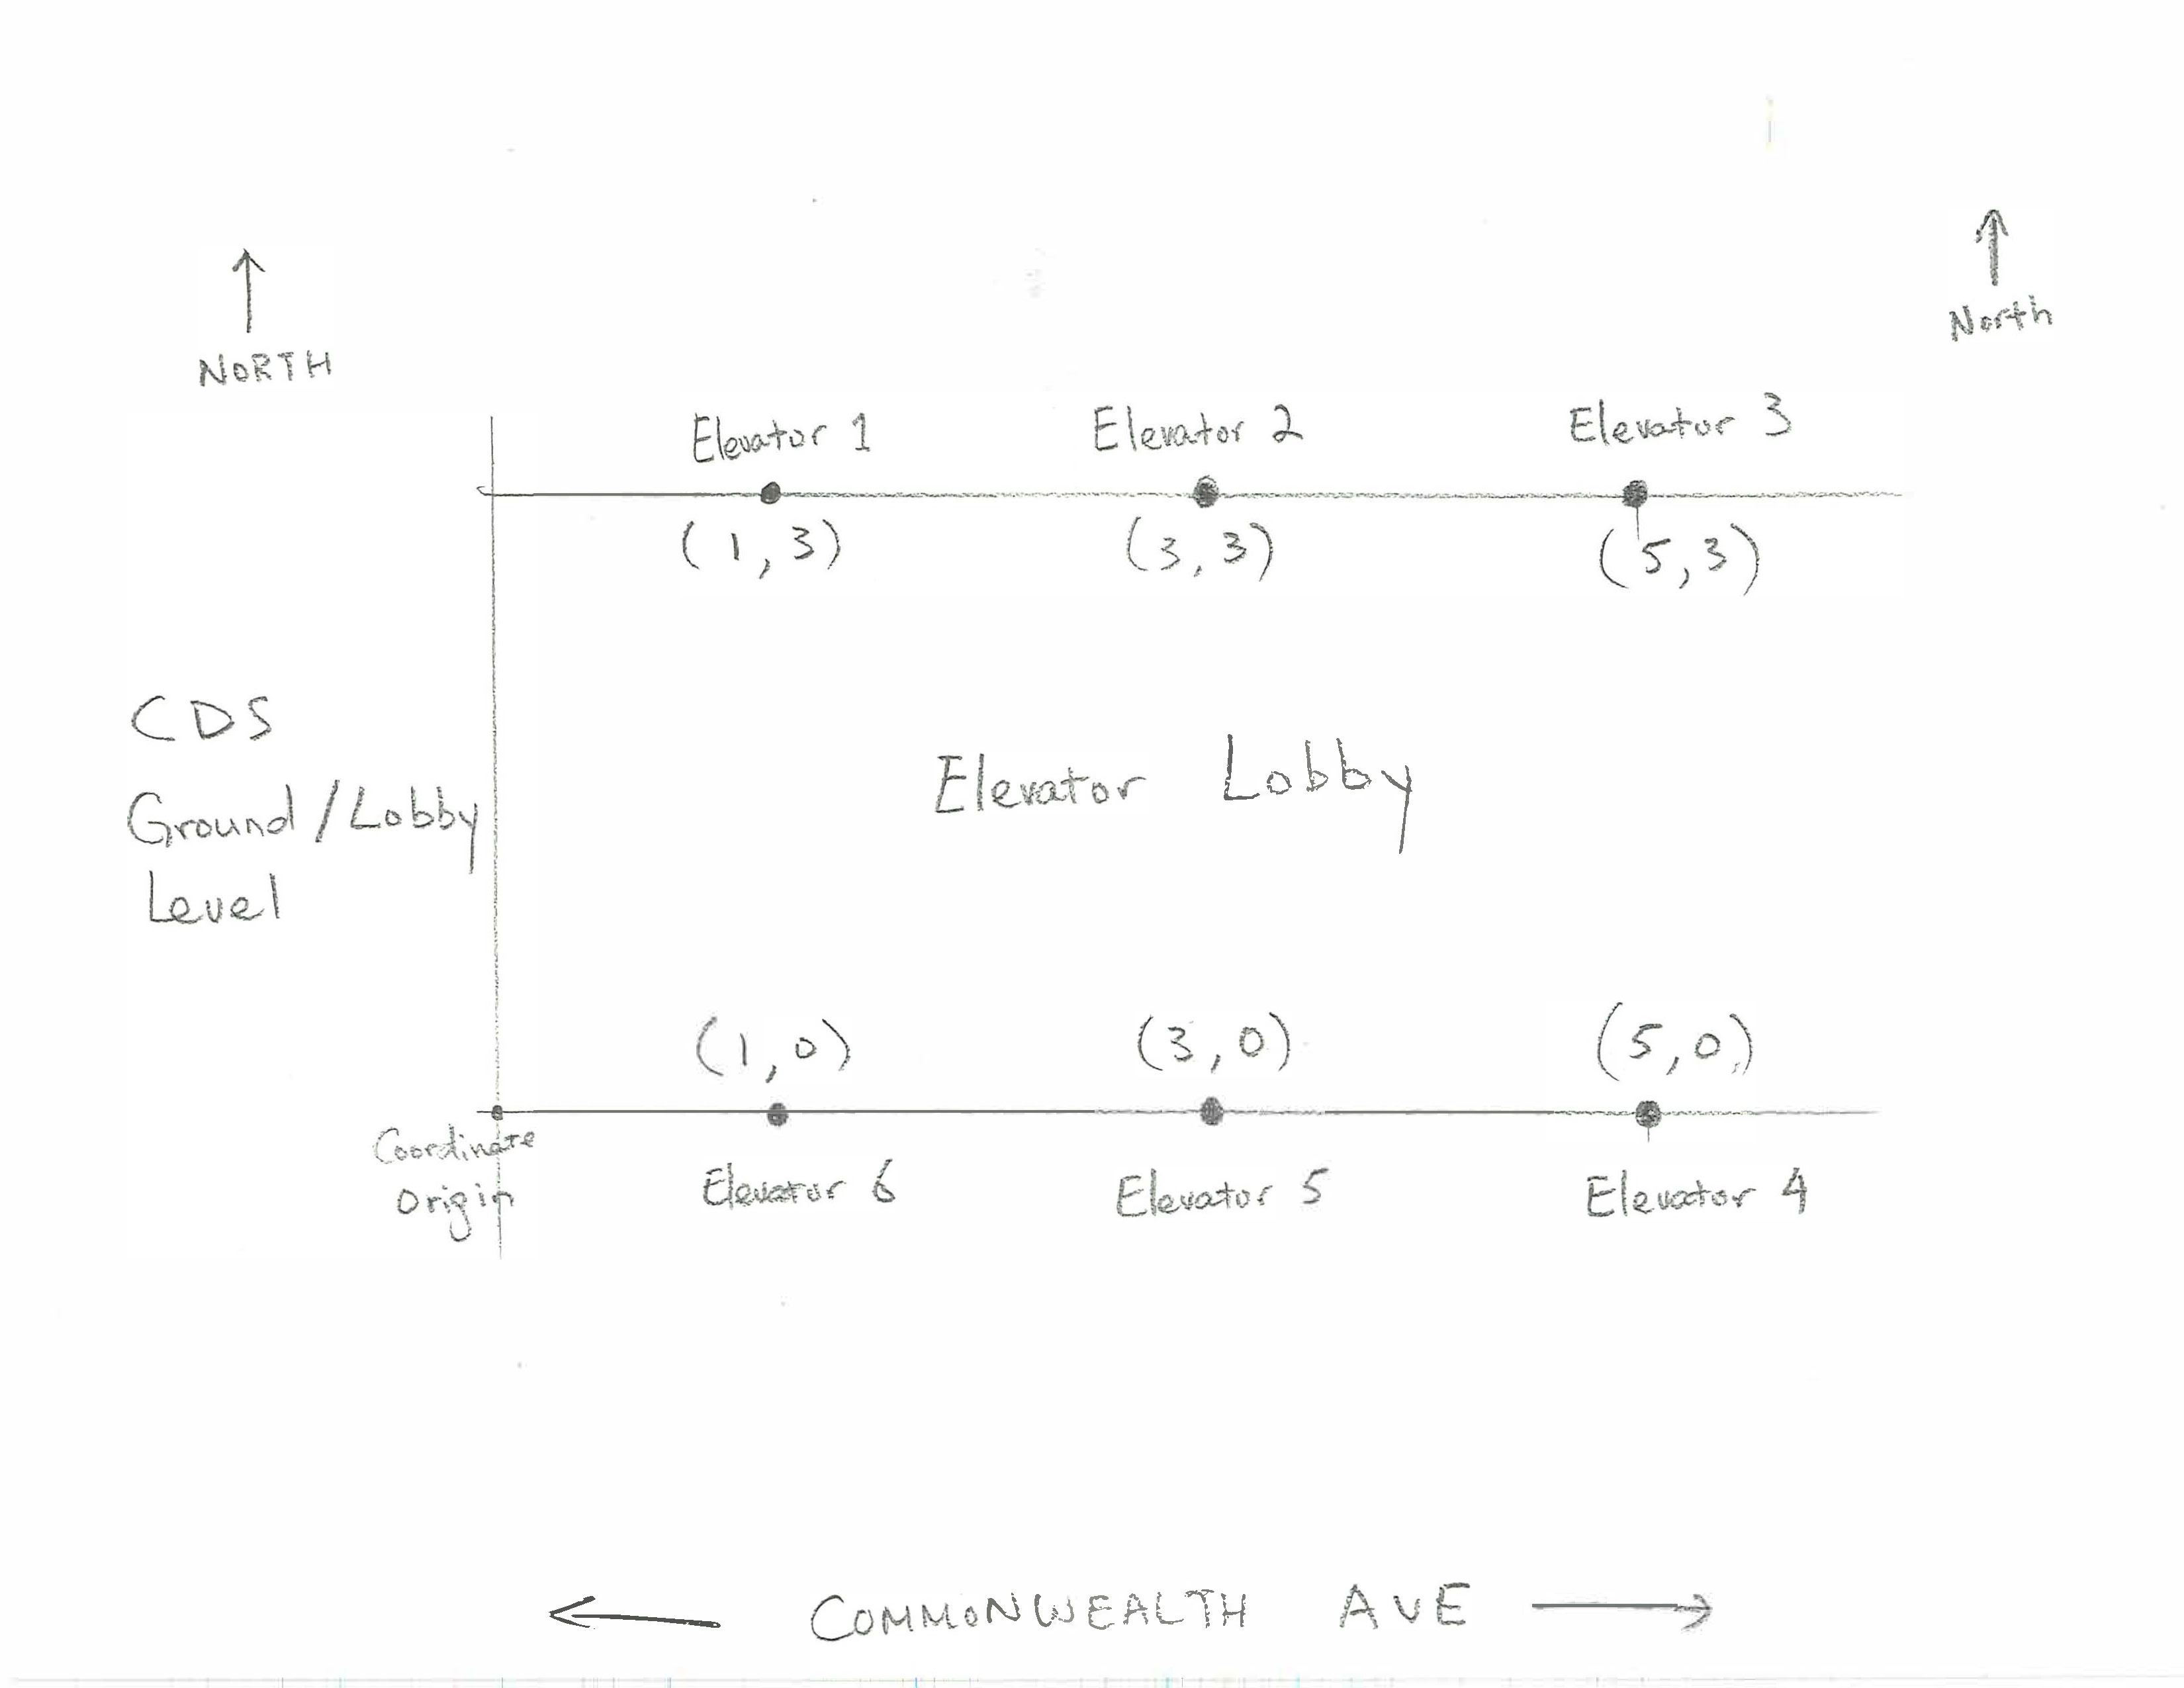

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** Stand in the middle at (3, 1.5)

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

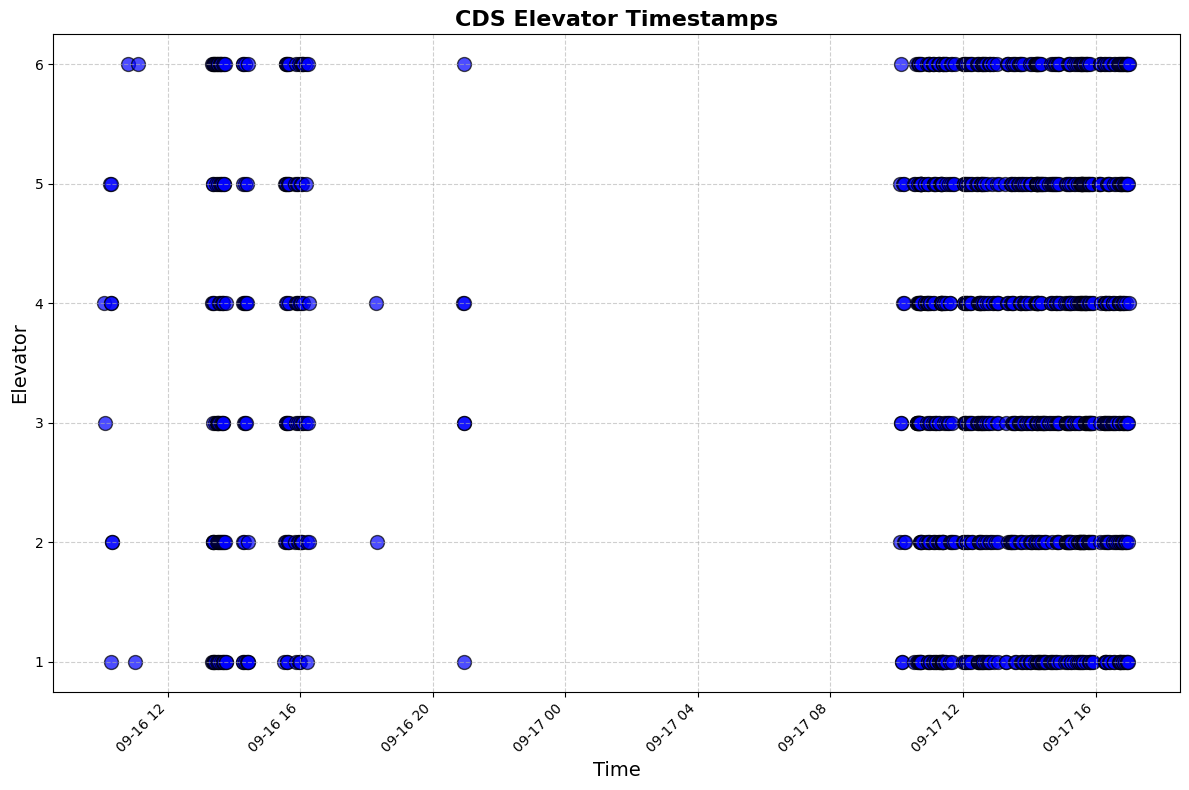

In [12]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/toto211738/Desktop/testing period CDS Elevator Arrivals - Form Responses 1.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    x = df['Timestamp']
    y = df['Elevator ID']
    
    plt.figure(figsize=(12, 8))  

    plt.scatter(x, y, color='blue', marker='o', s=100, edgecolor='black', alpha=0.7) 

    plt.xticks(rotation=45, ha='right')  

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Elevator', fontsize=14)
    plt.title('CDS Elevator Timestamps', fontsize=16, fontweight='bold')

    plt.tight_layout()  
    plt.show()

make_plot()

State observations here (briefly).

Elevators seem to open at the same rate. Tuesday has more points than Monday, so it looks more uniform.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [38]:
# Write any data processing code you need here

total_time = df['Email Address'].nunique() * 5 * 60
elevator_arrivals = df.groupby('Elevator ID').size()

elevator_frequencies =  elevator_arrivals / total_time

**Answer:** I think it's more optimal to wait closer to the right since elevators 3 and 4 open more often than the others. However, the Number of arrivals are close to each other so it's not significantly more optimal.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 26400 | 26400 | 26400 | 26400 | 26400 |26400 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 | 159 |
| Average frequency (arrivals per second) | 0.0059 | 0.0061 | 0.0064 | 0.0064 | 0.0063 | 0.0060 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [51]:
prop = elevator_arrivals / elevator_arrivals.sum()
prop

Elevator ID
1    0.158002
2    0.165138
3    0.173293
4    0.171254
5    0.170234
6    0.162080
dtype: float64

**Answer:** In order to find out which one is most likely to arrive, we sample all the elevators and divide each by the sum of the total arrivals to get the probability of each one. This will tell you if any elevtors arrive more often than others. 

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 15.80 | 16.51 | 17.33 | 17.13 | 17.02 | 16.21 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [47]:
x_coords = pd.array([1, 3, 5, 5, 3, 1])
y_coords = pd.array([3, 3, 3, 0, 0, 0])

x_avg = round((x_coords * prop ).sum(), 4)
y_avg = round((y_coords * prop ).sum(),4)

print(x_avg, y_avg)

3.0489 1.4893


**Answer:** (3.0489 , 1.4893). We take into account each coordinate and it's weight for arrival. This is the optimal location to stand to travel the least amount of distance. 

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [59]:
# Your code here

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}
    df = pd.read_csv(data)
    total_distances = []
    
    # For every data sample, calculate the distance from the input coordinate to
    # the elevator coordinate.
    for index, row in df.iterrows():
        elevator_coord = elevator_coordinates[row['Elevator ID']]
        distance = ((coordinate[0] - elevator_coord[0]) ** 2 + (coordinate[1] - elevator_coord[1]) ** 2)**0.5
        total_distances.append(distance)
    

    # Then, take the average.
    average_walk_distance = sum(total_distances) / len(total_distances)

    return average_walk_distance

# example usage
print(get_average_walk_distance("/Users/toto211738/Documents/GitHub/pharaoh-assignment-1/train.csv", (3,1.5)))
print(get_average_walk_distance("/Users/toto211738/Documents/GitHub/pharaoh-assignment-1/train.csv", (x_avg,y_avg)))

2.1646279306829768
2.163995392487266


**Answer:** Our initial average distance is 2.1646279306829768 but our new average distance based on the training data is 2.163995392487266

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1646279306829768 | 2.1646279306829768 |
|Smart position (Question 5) | 2.163995392487266 | 2.1628824844355026 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes, we have succeeded in finding a better location to wait for elevtors than our initial location. Our initial location has an average distance of 2.1646279306829768, but our new location has an average distance of 2.1628824844355026. 

In [60]:
print(get_average_walk_distance("/Users/toto211738/Documents/GitHub/pharaoh-assignment-1/train.csv", (3,1.5)))
print(get_average_walk_distance("/Users/toto211738/Documents/GitHub/pharaoh-assignment-1/test.csv", (x_avg,y_avg)))

2.1646279306829768
2.1628824844355026
